# A. Dataset Overview

- Name: CIFAR-10
- Description: CIFAR-10 is a collection of 60,000 32x32 color images in 10 classes, with 6,000 images per class.
- Classes: Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck.
- Motivation: The dataset is ideal for learning as it is small enough to train within a reasonable time and complex enough to require meaningful architectures.

In [3]:
from keras.datasets import cifar10 # Importing the dataset

In [4]:
# Importing the required libraries
import matplotlib.pyplot as plt
import numpy as np

In the dataset, the labels are represented in range between 0 and 9. These values represent a category, and we have written a dictionary where the key is the label and the value is a string represting a given category. 

In [6]:
labels = {
    0:"airplane",
    1:"automobile",
    2:"bird",
    3:"cat",
    4:"deer",
    5:"dog",
    6:"frog",
    7:"horse",
    8:"ship",
    9:"truck"
}

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() # Loading dataset

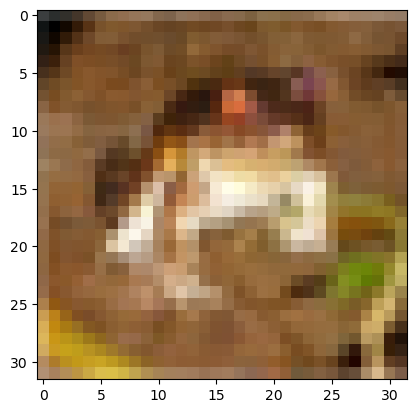

In [8]:
# Testing images in the dataset have been imported correctly
plt.imshow(x_train[0])
plt.show()

In [9]:
labels[y_train[0][0]]

'frog'

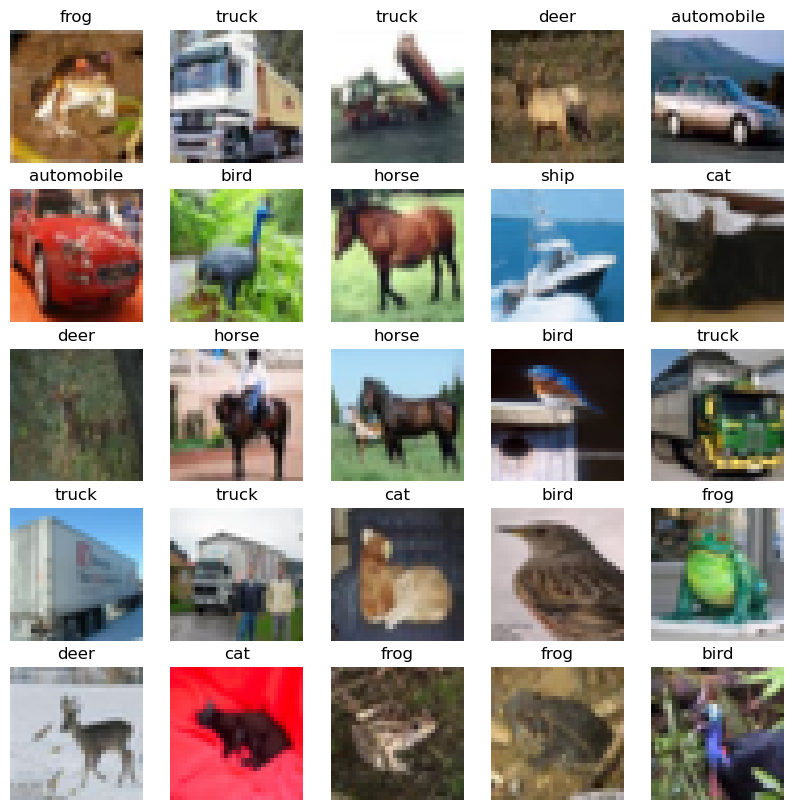

In [10]:
# Checking fr the first 25 images in the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(labels[y_train[i][0]])
    plt.axis('off')
plt.show()


# B. Sigmoid and ReLU Layers

## Sigmoid function
The sigmoid function is used as an activation function because it squashes the output to a probability value between 0 and 1, which is useful when the output is a probability or binary; hence, it is commonly used in binary classification models. The function also allows the network to learn more complex decision bondaries. The formula for the sigmoid function is $$ σ(x) = \frac{1}{1 + e^{-x}}. $$
## Derivative of sigmoid
Back propagation is essential to calculate the grandient of the loss function with respect to the weights and biases in a neural network. It allows the netowrk to effectively learn from its errors and adapt its weights based on the activating functions to update. The backward pass for sigmoid is the deravative of the sigmoid function, which can be mathematically expressed as $$ σ'(x) = σ(x) \cdot \bigl(1 - σ(x)\bigr) $$

In [13]:
class Sigmoid:
    @staticmethod
    def forward(x):
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def backward(x):
        return Sigmoid.forward(x) * (1 - Sigmoid.forward(x))

## ReLU function
The ReLU (Rectified Linear Unit) function helps the model learn more complex relationships in data and makes accurate predictions, and it's computationally efficient, due to its non-linearity. The ReLU function can be expressed as 
$$
\text{ReLU}(x) = 
\begin{cases} 
x, & \text{if } x \geq 0 \\ 
0, & \text{if } x < 0 
\end{cases}
$$
## Derivative of ReLU
The backward pass for the relu function can be expressed as 
$$
\text{ReLU}'(x) = 
\begin{cases} 
1, & \text{if } x > 0 \\ 
0, & \text{if } x \leq 0 
\end{cases}
$$

In [15]:
class Relu:
    @staticmethod
    def forward(x):
        return np.maximum(0, x)
    @staticmethod
    def backward(x):
        return (x > 0).astype(float)

In [16]:
# Example input data
x = np.array([[0.5, -1.0], [2.0, -0.5]])

# Sigmoid forward pass
sigmoid_output = Sigmoid.forward(x)
print("Sigmoid Forward Output:\n", sigmoid_output)

# ReLU forward pass
relu_output = Relu.forward(x)
print("ReLU Forward Output:\n", relu_output)

# Example gradient from next layer
grad = np.array([[0.1, 0.2], [0.3, 0.4]])

# Sigmoid backward pass
sigmoid_grad = Sigmoid.backward(grad)
print("Sigmoid Backward Gradient:\n", sigmoid_grad)

# ReLU backward pass
relu_grad = Relu.backward(grad)
print("ReLU Backward Gradient:\n", relu_grad)


Sigmoid Forward Output:
 [[0.62245933 0.26894142]
 [0.88079708 0.37754067]]
ReLU Forward Output:
 [[0.5 0. ]
 [2.  0. ]]
Sigmoid Backward Gradient:
 [[0.24937604 0.24751657]
 [0.24445831 0.24026075]]
ReLU Backward Gradient:
 [[1. 1.]
 [1. 1.]]


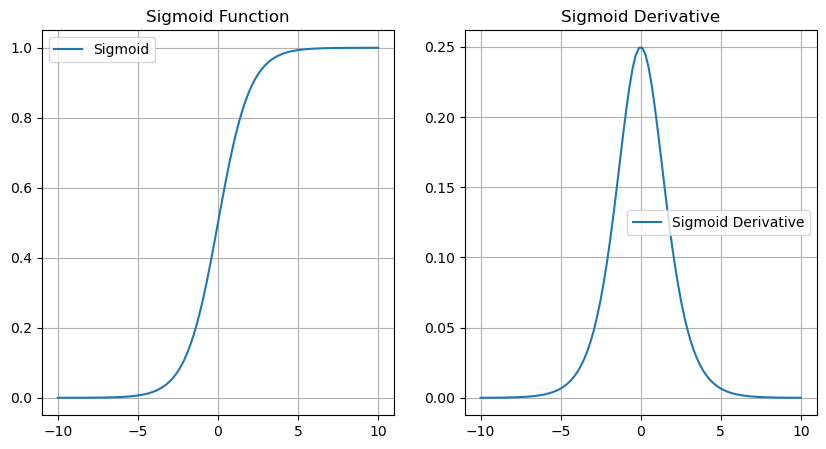

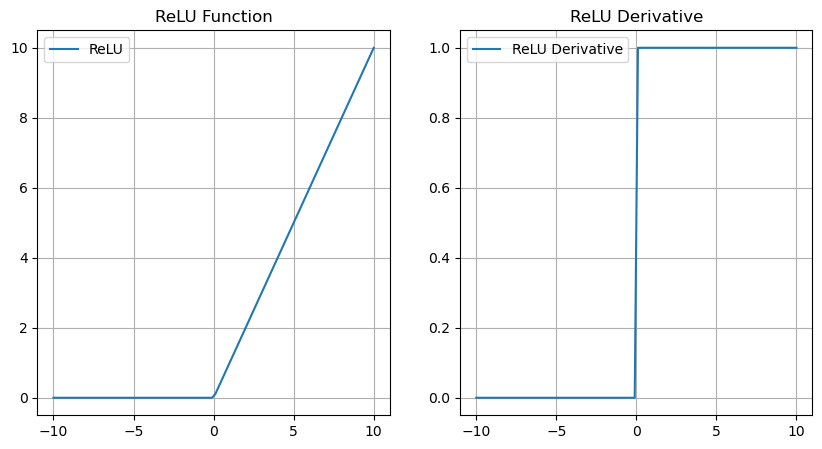

In [17]:
# Plot Sigmoid
x = np.linspace(-10, 10, 100)
sigmoid_output = Sigmoid.forward(x)
sigmoid_derivative = Sigmoid.backward(x)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, sigmoid_output, label="Sigmoid")
plt.title("Sigmoid Function")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, sigmoid_derivative, label="Sigmoid Derivative")
plt.title("Sigmoid Derivative")
plt.grid()
plt.legend()
plt.show()

# Plot ReLU
relu_output = Relu.forward(x)
relu_derivative = Relu.backward(x)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, relu_output, label="ReLU")
plt.title("ReLU Function")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, relu_derivative, label="ReLU Derivative")
plt.title("ReLU Derivative")
plt.grid()
plt.legend()
plt.show()


# C. Softmax Layer

## Softmax function
Unlike the sigmoid function, the softmax function is used in multiclass classification tasks: the function converts the output into probabilities, where the probability represents the likelihood of the input being in each class.The softmax function can mathematically be expressed as $$\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^n e^{z_j}}$$
## Derivative of Softmax
The derivative of the softmax function can be combined with the cross-entropy loss and expressed as $$ \frac{\delta L}{\delta z_i} = softmax(z_i) - y_i $$

Where $L$ is the cross-entropy loss and can be expressed as

$$
L = -\sum_i y_i log(softmax(z_i))
$$

In [20]:
class Softmax:
    @staticmethod
    def forward(logits):
        shifted_logits = logits - np.max(logits, axis=1, keepdims=True)  # Stability fix
        e = np.exp(shifted_logits)
        return e / np.sum(e, axis=1, keepdims=True)

    @staticmethod
    def backward(prob, y):
        return prob - y

Here, we use the Softmax function to test what labels the function predicts the first 10 images of the training set is.

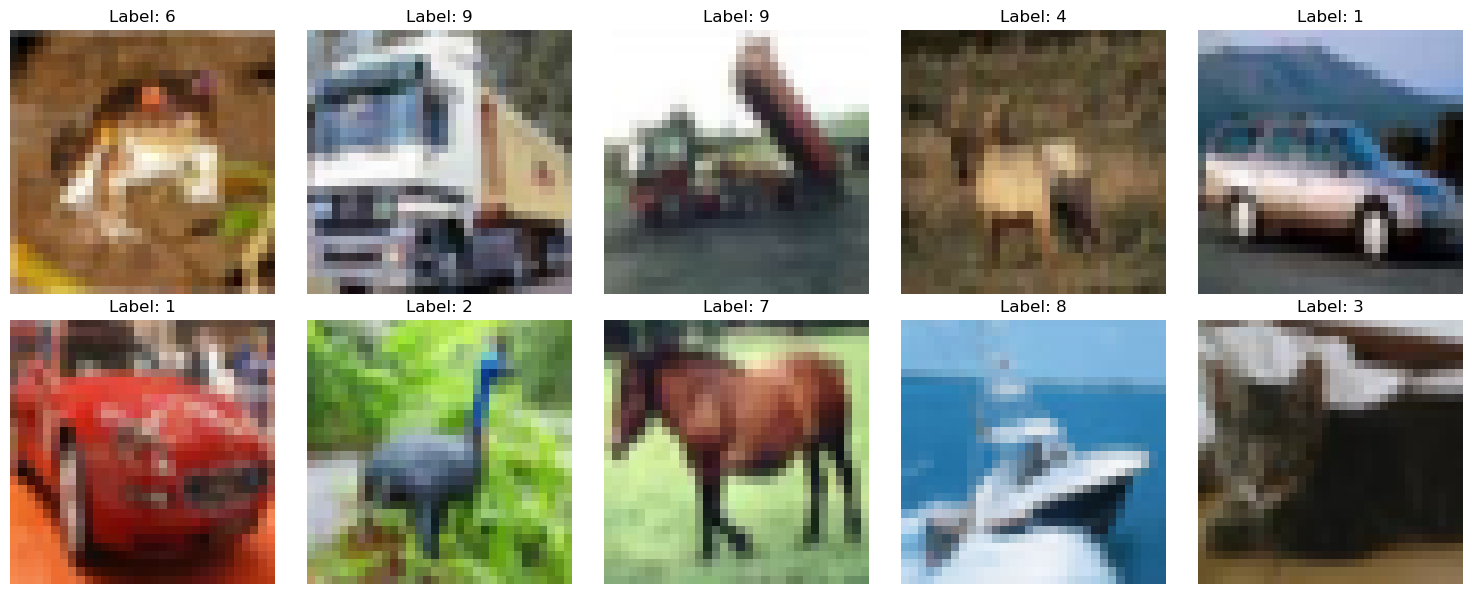

Predicted labels: ['frog', 'horse', 'airplane', 'automobile', 'horse', 'deer', 'dog', 'cat', 'bird', 'automobile']
Softmax Probabilities:
 [[0.08239222 0.0436635  0.09581943 0.22993732 0.03967112 0.03967177
  0.24322568 0.10800868 0.03135277 0.0862575 ]
 [0.10836678 0.10811652 0.2194011  0.02542312 0.0306926  0.0981652
  0.06255888 0.23584779 0.06947141 0.04195659]
 [0.3865014  0.0712155  0.09548937 0.02147176 0.05178518 0.09972429
  0.02823305 0.12995455 0.04895238 0.06667253]
 [0.04004055 0.46585641 0.07210346 0.02537814 0.16635835 0.02155819
  0.09005881 0.01029779 0.01936395 0.08898435]
 [0.19529397 0.11076465 0.08312879 0.06905724 0.02127467 0.04543102
  0.05887406 0.26858343 0.13158561 0.01600657]
 [0.09238198 0.04545695 0.03395126 0.12316492 0.18732545 0.16954664
  0.02886502 0.04903996 0.09304762 0.17722021]
 [0.04475699 0.06002511 0.02390498 0.02185031 0.16286925 0.28052474
  0.06724965 0.19714801 0.10375765 0.03791331]
 [0.08320843 0.2698833  0.05593146 0.27716049 0.00422157 

In [22]:
# Use the first 10 examples from the training set for testing
batch_size = 10
num_classes = 10

# Generate dummy logits for testing
np.random.seed(42)  # For reproducibility
logits = np.random.randn(batch_size, num_classes)  # Random logits for 10 images

# Convert labels to one-hot encoding
y_one_hot = np.zeros((batch_size, num_classes))
for i in range(batch_size):
    y_one_hot[i, y_train[i][0]] = 1

# Forward pass (softmax probabilities)
probabilities = Softmax.forward(logits)

# Backward pass (gradients w.r.t logits)
gradients = Softmax.backward(probabilities, y_one_hot)

# Display some of the training images with their labels
fig, ax = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(ax.flat):
    ax.imshow(x_train[i])
    ax.set_title(f"Label: {y_train[i][0]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

# Print results
print(f"Predicted labels: {[labels[np.argmax(i)] for i in probabilities]}")
print("Softmax Probabilities:\n", probabilities)
print("\nGradients w.r.t logits:\n", gradients)

# D. Dropout
Dropout prevents overfitting and regularises by randomly "dropping" connections between neurons in successive layers when training. This regularises the neural network, preventing overfitting, forcing the network to learn redundant representations, which improves generalisation. Firstly, we need to generate a mask: 
$$ 
m_{ij} =  
\begin{cases}
1 \text{ with probability } (1-p)\\
0 \text{ with probability } p
\end{cases}
$$
where $p$ represent the dropout rate: the probability of dropping a neuron by setting it to zero. $m$ is a binary matrix with the same shape as $x$. Then we apply the mask and scale, and we get the output $y$:

$$ y_{ij}=\frac{x_{ij}\cdot{m_{ij}}}{1-p} $$
The backward function (derivative), can instead be expressed as 
$$ \frac{\delta L}{\delta x_{ij}} = \frac{\delta L}{\delta y_{ij}} \cdot{\frac{m_{ij}}{1-p}} $$

In [24]:
class InvertedDropout:
    def __init__(self, dropout_rate):
        self.dropout_rate = dropout_rate
        self.mask = None

    def forward(self, x, training=True):
        if training:
            self.mask = (np.random.rand(*x.shape) > self.dropout_rate).astype(float)
            self.output = x * self.mask / (1 - self.dropout_rate)
        else:
            self.output = x
        return self.output

    def backward(self, grad):
        return grad * self.mask / (1 - self.dropout_rate)

In [25]:
x = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])

dropout_layer = InvertedDropout(dropout_rate=0.5)

# Forward pass during training
output_train = dropout_layer.forward(x, training=True)
print("Output during training:\n", output_train)

# Forward pass during test
output_test = dropout_layer.forward(x, training=False)
print("Output during testing:\n", output_test)

grad = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]])

# Backward pass
grad_back = dropout_layer.backward(grad)
print("Gradient after backward pass:\n", grad_back)


Output during training:
 [[ 0.  0.  0.]
 [ 0. 10.  0.]]
Output during testing:
 [[1. 2. 3.]
 [4. 5. 6.]]
Gradient after backward pass:
 [[0. 0. 0.]
 [0. 1. 0.]]


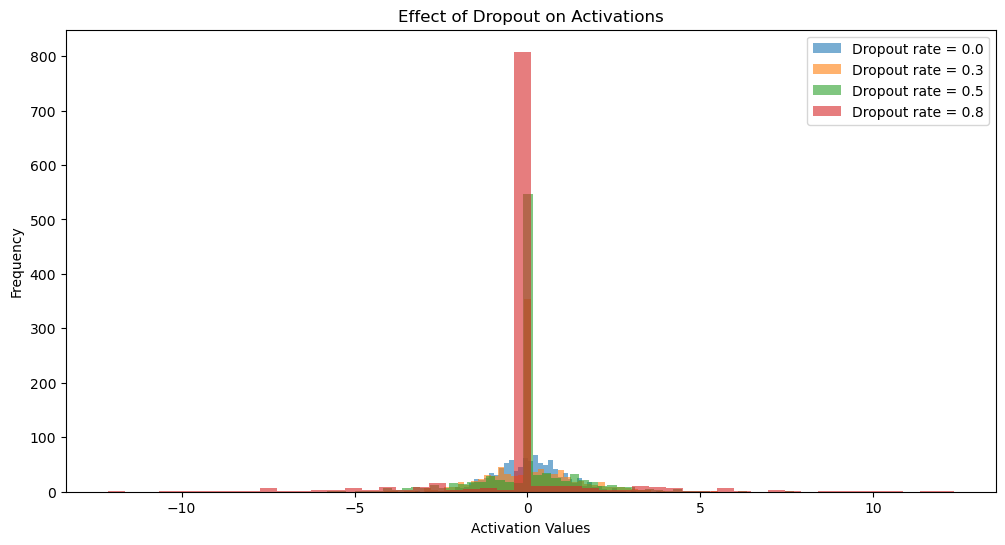

In [26]:
x = np.random.randn(1000)

# Apply dropout
dropout_rates = [0.0, 0.3, 0.5, 0.8]
plt.figure(figsize=(12, 6))

for rate in dropout_rates:
    dropout_layer = InvertedDropout(dropout_rate=rate)
    output = dropout_layer.forward(x, training=True)
    plt.hist(output, bins=50, alpha=0.6, label=f"Dropout rate = {rate}")

plt.title("Effect of Dropout on Activations")
plt.xlabel("Activation Values")
plt.ylabel("Frequency")
plt.legend()
plt.show()


# F. Optimizer

## Stochastic Gradient Descent (SGD)
Stochastic Gradient Descent (SGD) is a variant of gradient descent that updates the model's parameters using only a single or a few training examples at each step, rather than the full batch. This introduces noise in the optimization process, which can help escape local minima and speed up convergence. The rule is $$ θ=θ−η⋅∇J(θ) $$

## SGD with Momentum
SGD with momentum is a variation of the standard SGD that accelerates gradients vectors in the right directions, thus leading to faster converging. It introduces a "velocity" term that accumulates the gradient of the previous steps and helps overcome oscillations. The rule is $$ θ=θ−η⋅v 
t $$
$$ v 
t
 =βv 
t−1
 +(1−β)∇J(θ) $$

In [29]:
# Basic SGD Optimizer
class SGD:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
    
    def update(self, grads, params):
        return params - self.learning_rate * grads

# SGD with Momentum Optimizer
class SGDWithMomentum:
    def __init__(self, learning_rate=0.01, momentum=0.9):
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.velocity = None
    
    def update(self, grads, params):
        if self.velocity is None:
            self.velocity = {key: np.zeros_like(val) for key, val in params.items()}
        
        for key in params:
            self.velocity[key] = self.momentum * self.velocity[key] + self.learning_rate * grads[key]
     
            params[key] -= self.velocity[key]
        
        return params  


# E. Fully Parametrizable NN class 

In [31]:
class NeuralNetwork:
    def __init__(self, layers, activations, dropout_rates=None, regularizer=None, lambda_reg=0.01):
        self.layers = layers
        self.activations = activations
        self.dropout_rates = dropout_rates or [0.0] * (len(layers) - 1)
        self.regularizer = regularizer
        self.lambda_reg = lambda_reg
        self.params = {}
        self.cache = {}
        self.dropout_masks = {}

        # Initialize weights and biases
        for i in range(1, len(layers)):
            self.params[f"W{i}"] = np.random.randn(layers[i-1], layers[i]) * np.sqrt(2 / layers[i-1])
            self.params[f"b{i}"] = np.zeros((1, layers[i]))
            
    # Apply the forward pass of the activation function.
    def activation_forward(self, Z, activation):
        if activation == "relu":
            return Relu.forward(Z)
        elif activation == "sigmoid":
            return Sigmoid.forward(Z)
        elif activation == "softmax":
            return Softmax.forward(Z)
        else:
            raise ValueError("Unsupported activation function")

    def activation_backward(self, dA, Z, activation):
        """Compute gradient of activation function."""
        if activation == "relu":
            dZ = dA * (Z > 0)
            return dZ
        elif activation == "sigmoid":
            A = 1 / (1 + np.exp(-Z))
            return dA * A * (1 - A)
        elif activation == "softmax":
            # For softmax, we assume dA is already the correct gradient
            # as we're using cross-entropy loss
            return dA
        else:
            raise ValueError("Unsupported activation function")

    #Perform a forward pass through the network.
    def forward(self, X, training=True):
        self.cache["A0"] = X
        A = X

        for i in range(1, len(self.layers)):
            W, b = self.params[f"W{i}"], self.params[f"b{i}"]
            Z = np.dot(A, W) + b
            self.cache[f"Z{i}"] = Z
            A = self.activation_forward(Z, self.activations[i-1])
            self.cache[f"A{i}"] = A

            if training and self.dropout_rates[i-1] > 0:
                mask = (np.random.rand(*A.shape) > self.dropout_rates[i-1]).astype(float)
                A = A * mask / (1 - self.dropout_rates[i-1])
                self.dropout_masks[f"D{i}"] = mask
                self.cache[f"A{i}"] = A  # Update cache with dropped out activations

        return A

    def compute_loss(self, Y, predictions):
        m = Y.shape[0]
        cross_entropy = -np.sum(Y * np.log(predictions + 1e-8)) / m
        
        # Add regularization loss if applicable
        reg_loss = 0
        if self.regularizer:
            for i in range(1, len(self.layers)):
                W = self.params[f"W{i}"]
                if self.regularizer == "l2":
                    reg_loss += np.sum(np.square(W))
                elif self.regularizer == "l1":
                    reg_loss += np.sum(np.abs(W))
            reg_loss *= (self.lambda_reg / (2 * m))
            
        return cross_entropy + reg_loss

    # Perform a backward pass through the network to compute gradients.
    def backward(self, X, Y):
        m = X.shape[0]
        grads = {}
        
        # Initialize gradient of the loss with respect to the output layer
        dA = self.cache[f"A{len(self.layers)-1}"] - Y

        for i in reversed(range(1, len(self.layers))):
            Z = self.cache[f"Z{i}"]
            A_prev = self.cache[f"A{i-1}"]
            W = self.params[f"W{i}"]

            dropout_mask = self.dropout_masks.get(f"D{i}", None)

            # Compute dZ using the proper activation gradient
            if i == len(self.layers)-1:
                dZ = dA  
            else:
                dZ = self.activation_backward(dA, Z, self.activations[i-1])
                
                # Apply dropout mask to dZ (not dA)
                if dropout_mask is not None:
                    dZ = dZ * dropout_mask / (1 - self.dropout_rates[i-1])

            grads[f"dW{i}"] = np.dot(A_prev.T, dZ) / m
            grads[f"db{i}"] = np.sum(dZ, axis=0, keepdims=True) / m

            if i > 1:  # Only if not at the input layer
                dA = np.dot(dZ, W.T)

            if self.regularizer == "l2":
                grads[f"dW{i}"] += (self.lambda_reg / m) * W
            elif self.regularizer == "l1":
                grads[f"dW{i}"] += (self.lambda_reg / m) * np.sign(W)

        return grads

    # Update the weights and biases using the provided optimizer.
    def update_params(self, grads, optimizer):
        for i in range(1, len(self.layers)):
            W = self.params[f"W{i}"]
            b = self.params[f"b{i}"]

            self.params[f"W{i}"], self.params[f"b{i}"] = optimizer.update(grads[f"dW{i}"], self.params[f"W{i}"]), optimizer.update(grads[f"db{i}"], self.params[f"b{i}"])            
        return self.params

    def train(self, X, Y, epochs, learning_rate, batch_size, optimizer=None, decay=0.0):
        losses = []
        n_samples = X.shape[0]
        
        for epoch in range(epochs):
            # Shuffle the data
            permutation = np.random.permutation(n_samples)
            X_shuffled = X[permutation]
            Y_shuffled = Y[permutation]
            
            epoch_loss = 0
            batch_count = 0
            
            for batch_start in range(0, n_samples, batch_size):
                batch_end = min(batch_start + batch_size, n_samples)
                X_batch = X_shuffled[batch_start:batch_end]
                Y_batch = Y_shuffled[batch_start:batch_end]
                
                # Forward pass
                predictions = self.forward(X_batch, training=True)
                # Compute loss
                batch_loss = self.compute_loss(Y_batch, predictions)
                epoch_loss += batch_loss
                batch_count += 1
                
                # Backward pass and update
                grads = self.backward(X_batch, Y_batch)
                self.update_params(grads, optimizer)
            
            # Average loss for the epoch
            epoch_loss /= batch_count
            losses.append(epoch_loss)
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}")
            
            # Update learning rate
            learning_rate *= (1 / (1 + decay * epoch))
            
        return losses

    def predict(self, X):
        self.forward(X, training=False)  # Perform forward pass
        return self.cache[f"A{len(self.layers)-1}"] 

In [32]:
# Normalize and reshape data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(x_train.shape[0], -1)  # Flatten to (50000, 3072)
x_test = x_test.reshape(x_test.shape[0], -1)     # Flatten to (10000, 3072)

# Convert labels to one-hot
y_train = y_train.reshape(-1)  
y_test = y_test.reshape(-1)    

# Ensure labels are integer type
y_train = np.eye(10)[y_train.astype(int)]  
y_test = np.eye(10)[y_test.astype(int)]  

# Normalising for testing
y_test = np.array([np.argmax(i) for i in y_test])

# Check the shape of y_train after transformation
print("y_train shape after one-hot encoding:", y_train.shape)


y_train shape after one-hot encoding: (50000, 10)


In [34]:
# Create network
nn = NeuralNetwork(
    layers=[3072, 512, 256, 10],  
    activations=['relu', 'relu', 'softmax'],
    dropout_rates=[0.2, 0.2, 0.0],
    regularizer='l2',
    lambda_reg=0.01
)

optimizer = SGD(learning_rate=0.001)

# Train
losses = nn.train(
    x_train,
    y_train,
    epochs=10,
    learning_rate=0.01,
    batch_size=32,
    decay=1e-6,
    optimizer=optimizer
)

Epoch 1/10, Loss: 2.3606
Epoch 2/10, Loss: 2.2016
Epoch 3/10, Loss: 2.1389
Epoch 4/10, Loss: 2.0926
Epoch 5/10, Loss: 2.0591
Epoch 6/10, Loss: 2.0293
Epoch 7/10, Loss: 2.0041
Epoch 8/10, Loss: 1.9869
Epoch 9/10, Loss: 1.9638
Epoch 10/10, Loss: 1.9482


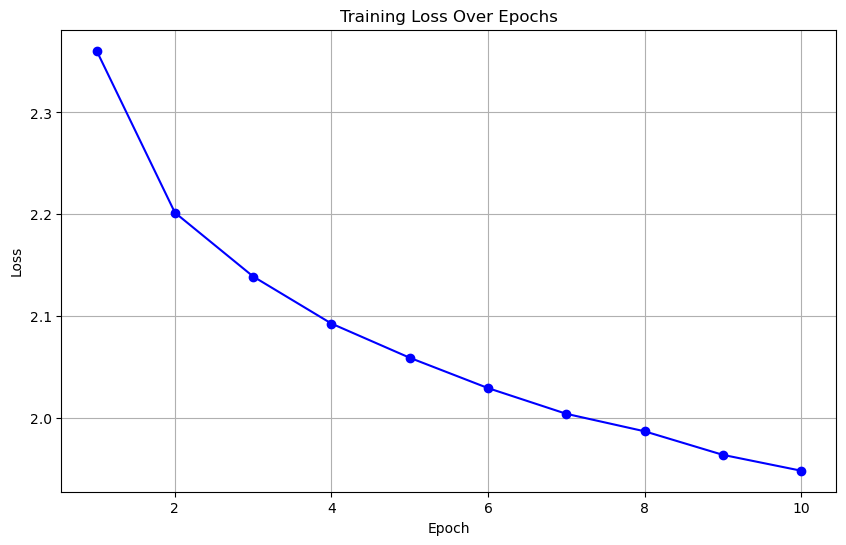

In [42]:
# Plotting the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(1, 11)], losses, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.show()

In [53]:
from sklearn.metrics import accuracy_score
y_pred = nn.predict(x_test)
y_pred = [np.argmax(i) for i in y_pred]
acc = accuracy_score(y_pred, y_test)
print(f"The accuracy of the model is {acc * 100:.2f}%")

The accuracy of the model is 42.41%


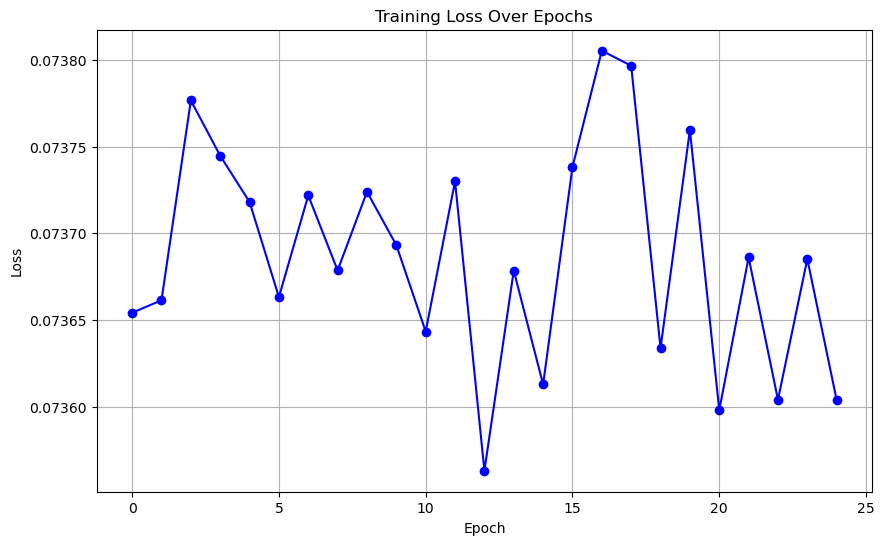

In [55]:
epochs = 25
losses = []

for epoch in range(epochs):
    nn.forward(x_train, training=True)  
    nn.backward(x_train, y_train)  
    predictions = nn.cache[f'A{len(nn.layers)-1}']  # Final activations (predictions)
 
    loss = np.mean(np.square(predictions - y_train))  # MSE loss
    
    losses.append(loss)
    
# Plotting the loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), losses, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.show()


# G.  Evaluate different neural network architectures/parameters

In [57]:
def get_architectures():
    return [
        ([64], 'single hidden layer with 64 units'),
        ([128, 64], 'two hidden layers with 128 and 64 units'),
        ([256, 128, 64], 'three hidden layers with 256, 128, and 64 units')]

def get_optimizers():
    return [('SGD', SGD(learning_rate=0.01)),
    ('SGD with Momentum', SGDWithMomentum(learning_rate=0.01, momentum=0.9))]

def get_regularizations():
    return [ ('Dropout 0.2', 0.2, None),  # Dropout rate of 0.2
    ('Dropout 0.5', 0.5, None),  # Dropout rate of 0.5
    ('L2 Regularization', None, 0.01)]  # L2 regularization with lambda = 0.01

def get_hyperparameters():
    return [
        ('Learning Rate 0.001', 0.001, 32),
        ('Learning Rate 0.005', 0.005, 64),
        ('Learning Rate 0.01', 0.01, 128)
    ]

Number of tests:

Architectures: 3 (A, B, and C)

Activations: 2 (ReLU/Softmax and Sigmoid/Softmax)

Optimizers: 1 (SGD)

Regularizations: 3 (L2, Dropout, None)

Total combinations = 3(architectures)×2(activations)×1(optimizer)×3(regularizations) = 18combinations


In [66]:
# Define different hyperparameter configurations
architectures = [
    [3072, 512, 256, 10],  # Architecture A
    [3072, 1024, 10],      # Architecture B
    [3072, 1024, 512, 10]  # Architecture C
]

activations = [
    ['relu', 'relu', 'softmax'],  # ReLU for hidden, Softmax for output
    ['sigmoid', 'sigmoid', 'softmax']  # Sigmoid for hidden, Softmax for output
]

optimizers = [
    SGD(learning_rate=0.001)
]

regularizations = [
    ('l2', 0.01), 
    ('dropout', 0.2),  
    ('none', 0)  
]

# Initialize variables to store loss values
losses_dict = {}

for architecture in architectures:
    for activation in activations:
        for optimizer in optimizers:
            for reg_type, lambda_reg in regularizations:
                
                nn = NeuralNetwork(
                    layers=architecture,
                    activations=activation,
                    regularizer=reg_type,
                    lambda_reg=lambda_reg
                )
                
                # Train the model
                losses = nn.train(
                    x_train,
                    y_train,
                    epochs=5,
                    learning_rate=0.001,
                    batch_size=32,
                    decay=1e-6,
                    optimizer=optimizer
                )
                
                # Store the loss for each configuration
                key = f"Arch {architecture} - Act {activation} - Opt {optimizer.__class__.__name__} - Reg {reg_type}"
                losses_dict[key] = losses
                
                print("")

Epoch 1/5, Loss: 2.2701
Epoch 2/5, Loss: 2.1040
Epoch 3/5, Loss: 2.0387
Epoch 4/5, Loss: 1.9970
Epoch 5/5, Loss: 1.9644

Epoch 1/5, Loss: 2.0102
Epoch 2/5, Loss: 1.8508
Epoch 3/5, Loss: 1.7913
Epoch 4/5, Loss: 1.7499
Epoch 5/5, Loss: 1.7175

Epoch 1/5, Loss: 2.0339
Epoch 2/5, Loss: 1.8604
Epoch 3/5, Loss: 1.7965
Epoch 4/5, Loss: 1.7545
Epoch 5/5, Loss: 1.7218

Epoch 1/5, Loss: 2.5454
Epoch 2/5, Loss: 2.5114
Epoch 3/5, Loss: 2.4892
Epoch 4/5, Loss: 2.4673
Epoch 5/5, Loss: 2.4455

Epoch 1/5, Loss: 2.2998
Epoch 2/5, Loss: 2.2734
Epoch 3/5, Loss: 2.2538
Epoch 4/5, Loss: 2.2342
Epoch 5/5, Loss: 2.2140

Epoch 1/5, Loss: 2.3121
Epoch 2/5, Loss: 2.2769
Epoch 3/5, Loss: 2.2556
Epoch 4/5, Loss: 2.2349
Epoch 5/5, Loss: 2.2143

Epoch 1/5, Loss: 5.6884
Epoch 2/5, Loss: 4.3535
Epoch 3/5, Loss: 3.9130
Epoch 4/5, Loss: 3.6945
Epoch 5/5, Loss: 3.5000

Epoch 1/5, Loss: 5.6526
Epoch 2/5, Loss: 4.1495
Epoch 3/5, Loss: 3.7262
Epoch 4/5, Loss: 3.4232
Epoch 5/5, Loss: 3.2529

Epoch 1/5, Loss: 5.5938
Epoch 2/

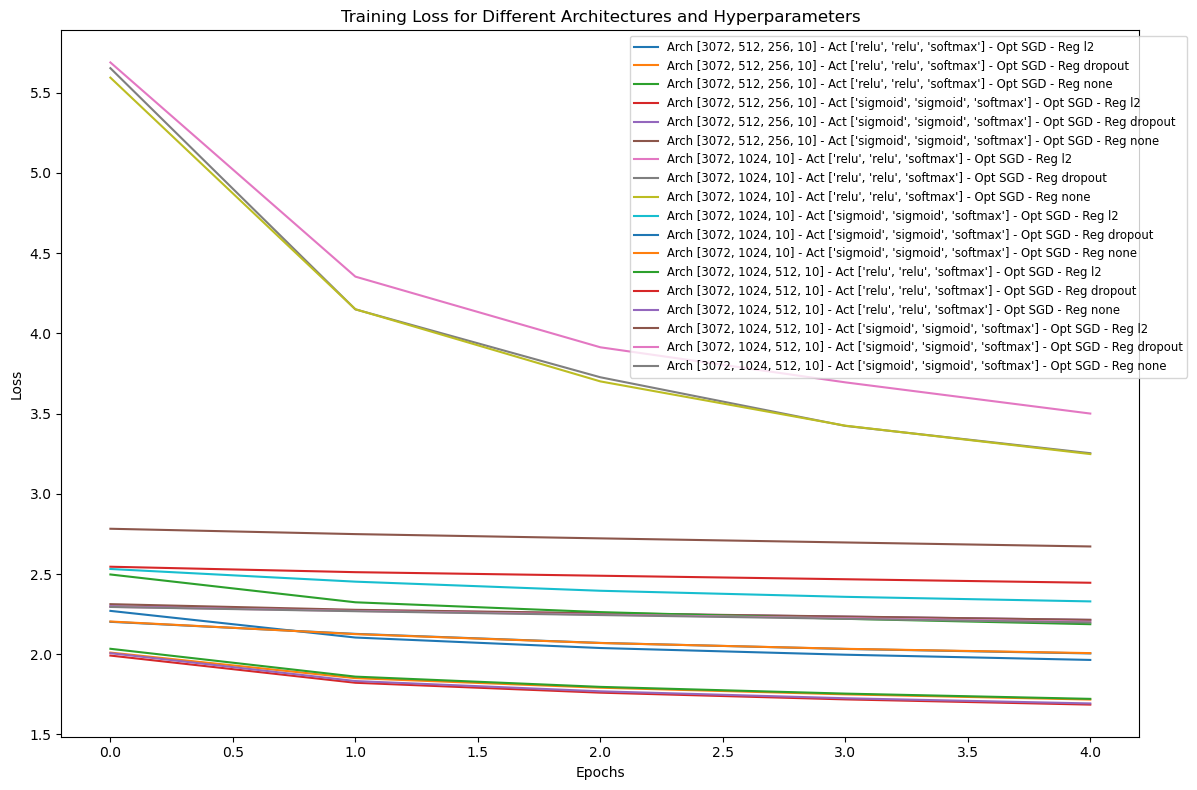

In [67]:
#Better plot visualization

plt.figure(figsize=(12, 8))

# Plot the loss for this configuration
for key, losses in losses_dict.items():
    plt.plot(losses, label=key)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss for Different Architectures and Hyperparameters')

# Add legend with optimized positioning and font size
plt.legend(loc='upper right', fontsize='small', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()